In [5]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [6]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [7]:
df =pd.read_csv(r'C:\Users\Shriya\OneDrive\Documents\Prodigy Infotech\Prodigy_ML_01\House Price Prediction Dataset.csv')
print(df.head())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


In [9]:
print(df.describe())

                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt          Price  
count  2000.000000    2000.000000  
mean   1961.446000  537676.855000  
std      35.926695  276428.845719  
min    1900.000000   50005.000000  
25%    1930.000000  300098.000000  
50%    1961.000000  539254.000000  
75%    1993.000000  780086.000000  
max    2023.000000  999656.000000  


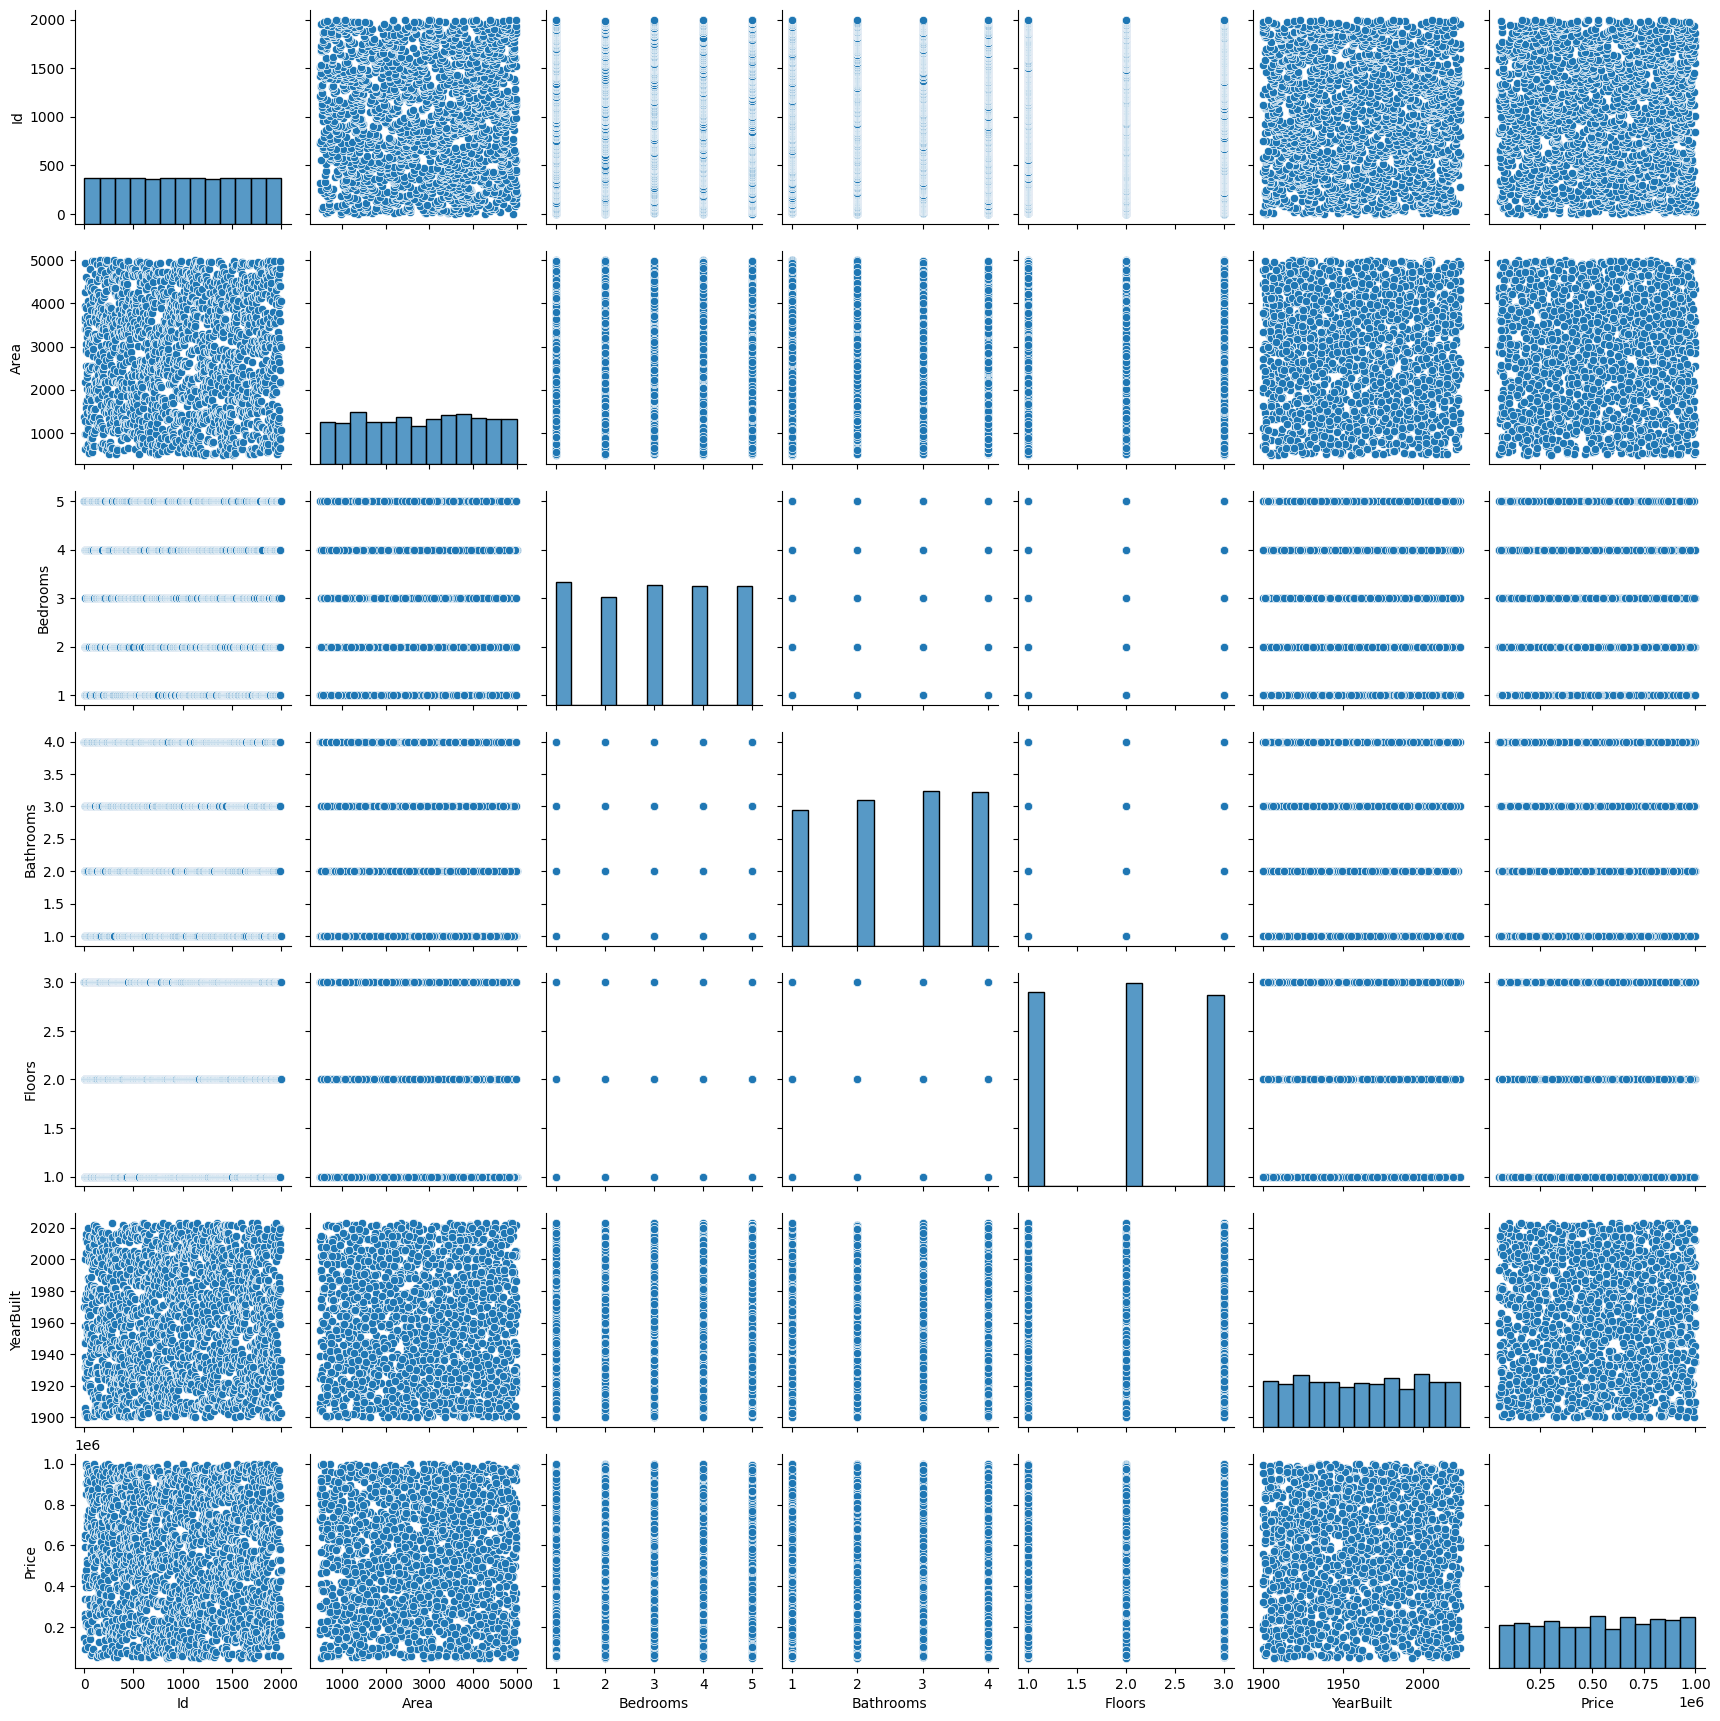

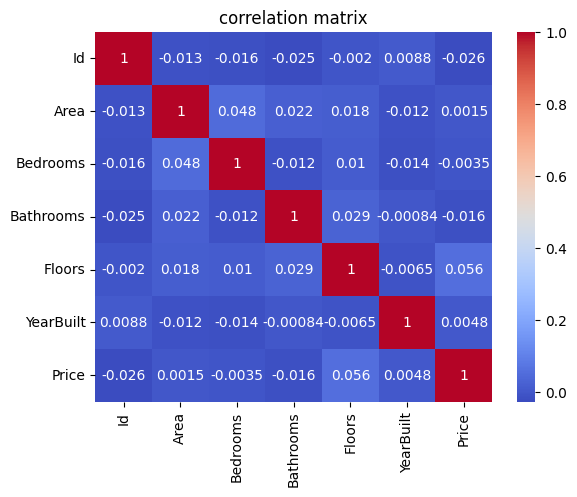

In [10]:
#EXPLORATORY DATA ANALYSIS
sns.pairplot(df)
plt.show()
numeric_df=df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

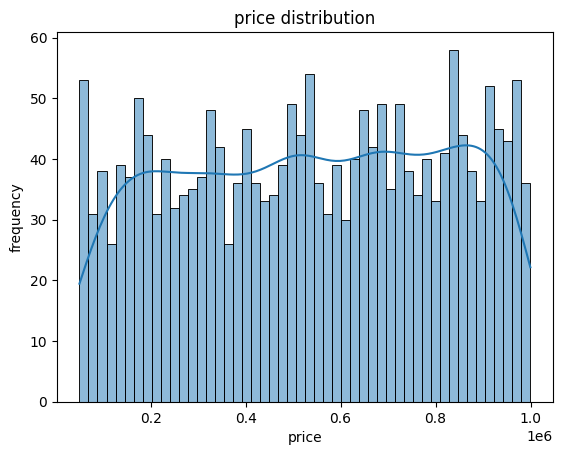

In [11]:
sns.histplot(df['Price'],bins=50,kde=True)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [12]:
#define features and target
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']


In [13]:
#split into train and test sets(60% TRAIN,40% TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
lm=LinearRegression()#create a model
lm.fit(X_train,y_train)#train a model

LinearRegression()

In [15]:
print("Intercept:",lm.intercept_)


Intercept: 561284.0391500255


In [16]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

           Coefficient
Area         -0.095410
Bedrooms    -13.259538
Bathrooms -9759.661183


In [17]:
predictions=lm.predict(X_test)


In [18]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

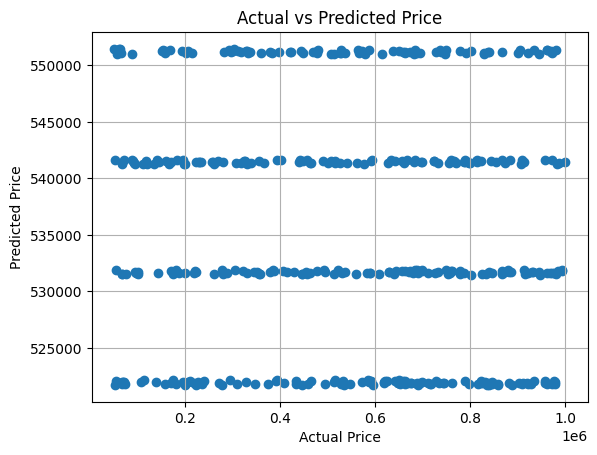

In [19]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()


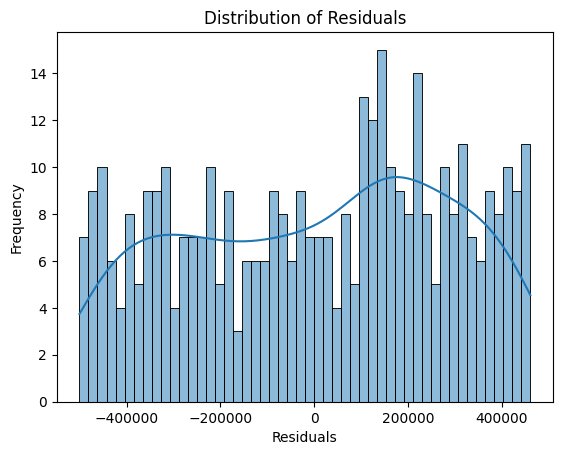

In [20]:
# Histogram of residuals
sns.histplot(y_test - predictions, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [21]:
# MAE, MSE, RMSE
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error (MAE): 243756.4797682511
Mean Squared Error (MSE): 78440549944.81049
Root Mean Squared Error (RMSE): 280072.40125512274


In [22]:
# SAVE THE TRAINED MODEL USING PICKLE
import pickle

# Save the model with the same name as the notebook (but .pkl extension)
with open('Linear_Regression_Model.pkl', 'wb') as f:
    pickle.dump(lm, f)

print("✅ Model saved successfully as 'Linear_Regression_Model.pkl'")


✅ Model saved successfully as 'Linear_Regression_Model.pkl'
